# Optimizer step이 미치는 영향

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

## 학습 데이터 준비

In [2]:

x_train = torch.tensor([[1.0], [2.0], [3.0], [4.0]])
y_train = torch.tensor([[2.0], [4.0], [6.0], [8.0]])

In [3]:

x = torch.tensor([[10.0], [20.0], [33.0], [52.0]])
y = torch.tensor([[22.0], [18.0], [35.0], [48.0]])

## Training

### 동일 모델,optim step으로 영향을 준다는 것을 보여줌

0 
 초기화 전 가중치 Parameter containing:
tensor([[0.5084]], requires_grad=True)
loss1: 20.35529327392578
first weight: Parameter containing:
tensor([[0.7553]], requires_grad=True)

loss2 :105.69291687011719
other weight: Parameter containing:
tensor([[6.1635]], requires_grad=True)

1 
 초기화 전 가중치 Parameter containing:
tensor([[6.1635]], requires_grad=True)
loss1: 127.7900161743164
first weight: Parameter containing:
tensor([[5.5443]], requires_grad=True)

loss2 :22265.609375
other weight: Parameter containing:
tensor([[-92.7480]], requires_grad=True)

2 
 초기화 전 가중치 Parameter containing:
tensor([[-92.7480]], requires_grad=True)
loss1: 68800.234375
first weight: Parameter containing:
tensor([[-78.3815]], requires_grad=True)

loss2 :6752755.0
other weight: Parameter containing:
tensor([[1638.6133]], requires_grad=True)

3 
 초기화 전 가중치 Parameter containing:
tensor([[1638.6133]], requires_grad=True)
loss1: 20518344.0
first weight: Parameter containing:
tensor([[1390.5132]], requires_grad=True)

lo

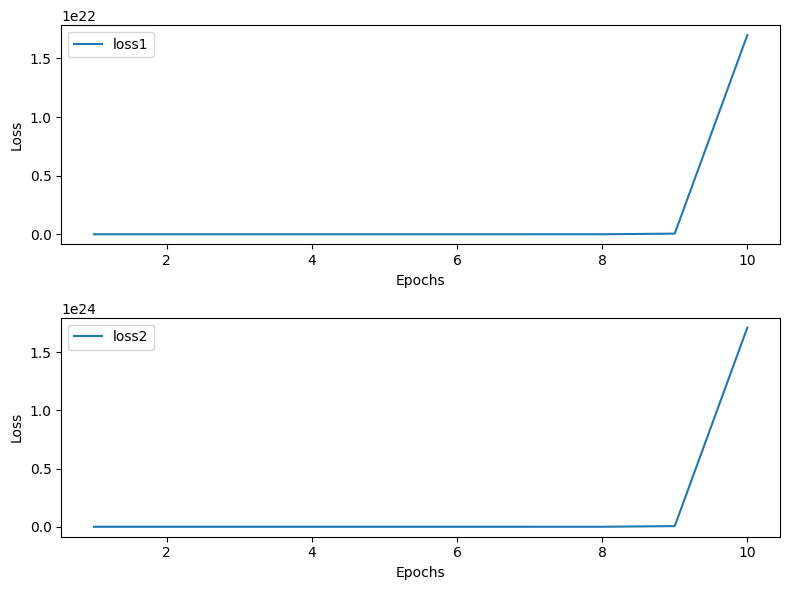

In [4]:
# 모델 정의
model = nn.Linear(1, 1)

# 손실 함수 및 최적화 알고리즘 정의
criterion = nn.MSELoss()
criterion2 = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


loss1_list =[]
loss2_list =[]
for epoch in range(10):
    #이때 가중치에 영향을 준 것을 볼 수 있음
    print(epoch,'\n',"초기화 전 가중치",model.weight)
    optimizer.zero_grad()

    #forward
    output = model(x_train)
    loss = criterion(output, y_train)
    print(f"loss1: {loss}")


    #backward
    loss.backward()
    optimizer.step()
    print(f"first weight: {model.weight}\n")


    ######다른데이터
    #forward
    output2 = model(x)
    loss2 = criterion2(output2, y)
    print(f"loss2 :{loss2}")

    loss2.backward()
    optimizer.step()
    print(f"other weight: {model.weight}\n")


    loss1_list.append(loss.item())
    loss2_list.append(loss2.item())



#오차 시각화
epochs = range(1, 11)


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
ax1.plot(epochs, loss1_list, label='loss1')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(epochs, loss2_list, label='loss2')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.tight_layout()
plt.show()

### 따로 학습했을 때
: 다른 model, optim, 같은 criterion

0 
 Parameter containing:
tensor([[0.2679]], requires_grad=True)
loss: 31.298221588134766
first weight: Parameter containing:
tensor([[0.5736]], requires_grad=True)

loss: 4080.827392578125
first weight: Parameter containing:
tensor([[40.6883]], requires_grad=True)

1 
 Parameter containing:
tensor([[0.5736]], requires_grad=True)
loss: 21.721534729003906
first weight: Parameter containing:
tensor([[0.8282]], requires_grad=True)

loss: 1692396.5
first weight: Parameter containing:
tensor([[-770.0608]], requires_grad=True)

2 
 Parameter containing:
tensor([[0.8282]], requires_grad=True)
loss: 15.076448440551758
first weight: Parameter containing:
tensor([[1.0403]], requires_grad=True)

loss: 639008256.0
first weight: Parameter containing:
tensor([[14981.9844]], requires_grad=True)

3 
 Parameter containing:
tensor([[1.0403]], requires_grad=True)
loss: 10.465539932250977
first weight: Parameter containing:
tensor([[1.2169]], requires_grad=True)

loss: 241215307776.0
first weight: Paramet

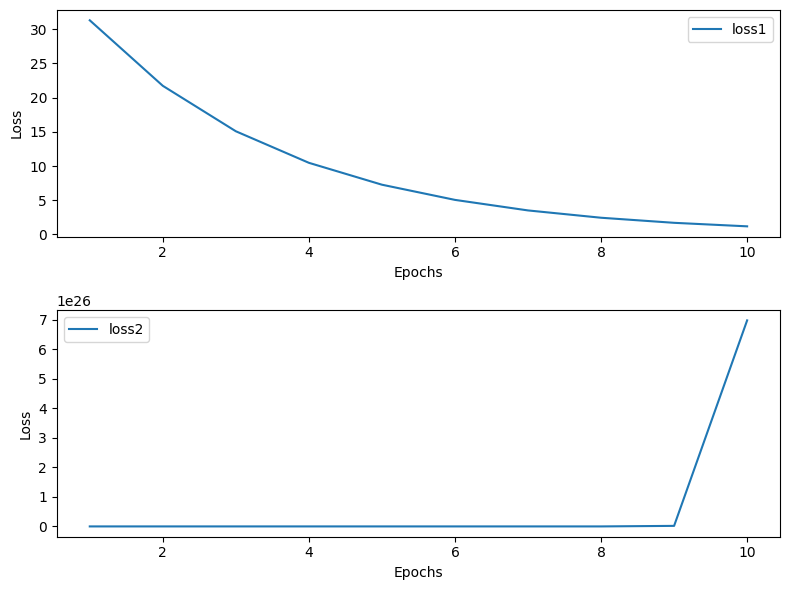

In [5]:
# 모델 정의
model1 = nn.Linear(1, 1)
model2 = nn.Linear(1, 1)

# 손실 함수 및 최적화 알고리즘 새로 초기화 정의
criterion = nn.MSELoss()
optimizer1 = optim.SGD(model1.parameters(), lr=0.01)
optimizer2 = optim.SGD(model2.parameters(), lr=0.01)
 
loss1_list = []
loss2_list = []

for epoch in range(10):
    print(epoch,'\n', model1.weight)
    optimizer1.zero_grad()

    #forward
    output1 = model1(x_train)
    loss1 = criterion(output1, y_train)
    print(f"loss: {loss1}")

    #backward
    loss1.backward()
    optimizer1.step()
    print(f"first weight: {model1.weight}\n")

    ##########두번째 데이터
    #forward
    output2 = model2(x)
    loss2 = criterion(output2, y)
    print(f"loss: {loss2}")

    #backward
    loss2.backward()
    optimizer2.step()
    print(f"first weight: {model2.weight}\n")

    loss1_list.append(loss1.item())
    loss2_list.append(loss2.item())


epochs = range(1, 11)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
ax1.plot(epochs, loss1_list, label='loss1')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(epochs, loss2_list, label='loss2')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.tight_layout()
plt.show()


### 따로 학습했을 때
: 다른 model, optim, criterion

0 
 Parameter containing:
tensor([[-0.7464]], requires_grad=True)
loss: 48.2120361328125
first weight: Parameter containing:
tensor([[-0.3664]], requires_grad=True)

loss: 896.7984619140625
first weight: Parameter containing:
tensor([[19.2659]], requires_grad=True)

1 
 Parameter containing:
tensor([[-0.3664]], requires_grad=True)
loss: 33.55290603637695
first weight: Parameter containing:
tensor([[-0.0496]], requires_grad=True)

loss: 359910.75
first weight: Parameter containing:
tensor([[-354.6008]], requires_grad=True)

2 
 Parameter containing:
tensor([[-0.0496]], requires_grad=True)
loss: 23.38064956665039
first weight: Parameter containing:
tensor([[0.2145]], requires_grad=True)

loss: 135882832.0
first weight: Parameter containing:
tensor([[6909.2319]], requires_grad=True)

3 
 Parameter containing:
tensor([[0.2145]], requires_grad=True)
loss: 16.321741104125977
first weight: Parameter containing:
tensor([[0.4348]], requires_grad=True)

loss: 51293560832.0
first weight: Paramete

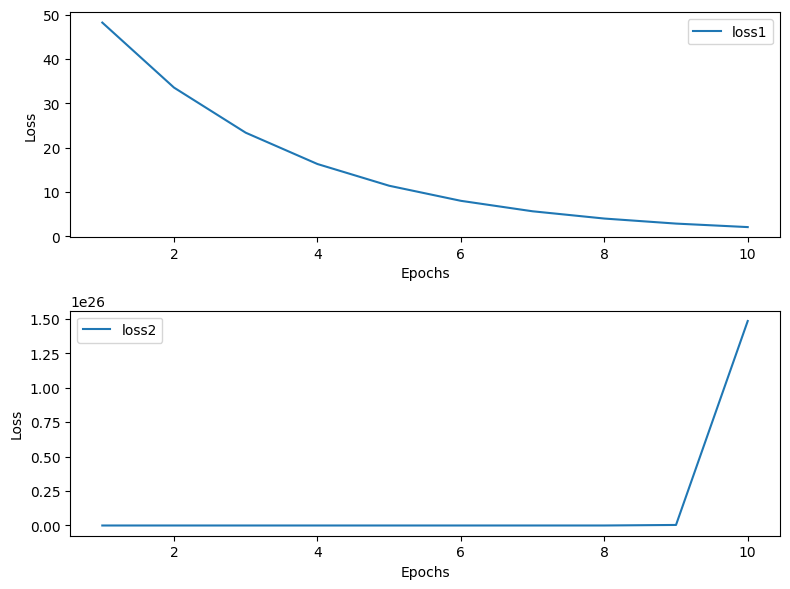

In [6]:
# 모델 정의
model1 = nn.Linear(1, 1)
model2 = nn.Linear(1, 1)

# 손실 함수 및 최적화 알고리즘 새로 초기화 정의
criterion1 = nn.MSELoss()
criterion2 = nn.MSELoss()
optimizer1 = optim.SGD(model1.parameters(), lr=0.01)
optimizer2 = optim.SGD(model2.parameters(), lr=0.01)
 
loss1_list = []
loss2_list = []

for epoch in range(10):
    print(epoch,'\n', model1.weight)
    optimizer1.zero_grad()

    #forward
    output1 = model1(x_train)
    loss1 = criterion1(output1, y_train)
    print(f"loss: {loss1}")

    #backward
    loss1.backward()
    optimizer1.step()
    print(f"first weight: {model1.weight}\n")

    ##########두번째 데이터
    #forward
    output2 = model2(x)
    loss2 = criterion2(output2, y)
    print(f"loss: {loss2}")

    #backward
    loss2.backward()
    optimizer2.step()
    print(f"first weight: {model2.weight}\n")

    loss1_list.append(loss1.item())
    loss2_list.append(loss2.item())

epochs = range(1, 11)


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
ax1.plot(epochs, loss1_list, label='loss1')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(epochs, loss2_list, label='loss2')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.tight_layout()
plt.show()